## Objective - To determine the score of a student on the basis of number of hours studied per day.

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
sns.set(rc={'figure.figsize':(15,12)})

### Let us download the data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Checking if we have any NULL Values in the dataset

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Checking the statistical summary of the data


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing the dataset

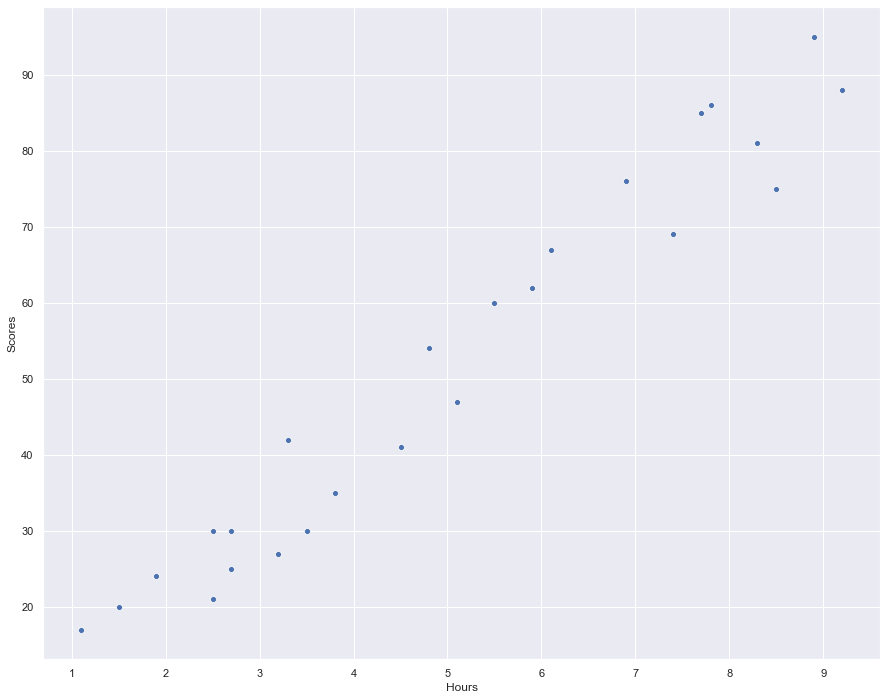

In [21]:
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.show()

### we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

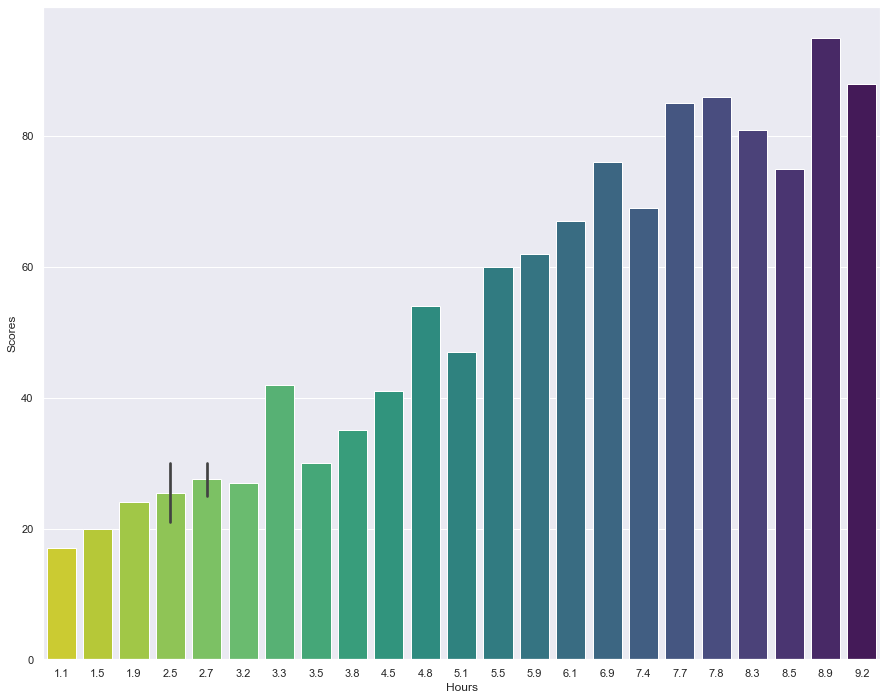

In [16]:
sns.barplot(x='Hours',y='Scores',data=data,palette='viridis_r')
plt.show()

## Data Modelling

In [17]:
feature = data['Hours']
target = data['Scores']
feature = np.array(feature).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [18]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.intercept_,reg.coef_)

2.826892353899737 [9.68207815]


In [19]:
pred0 = reg.predict(X_train)
metrics.mean_squared_error(X_train,y_train)

2609.171

In [20]:
pred1 = reg.predict(X_test)
pred1

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

### Plotting the Regression Line

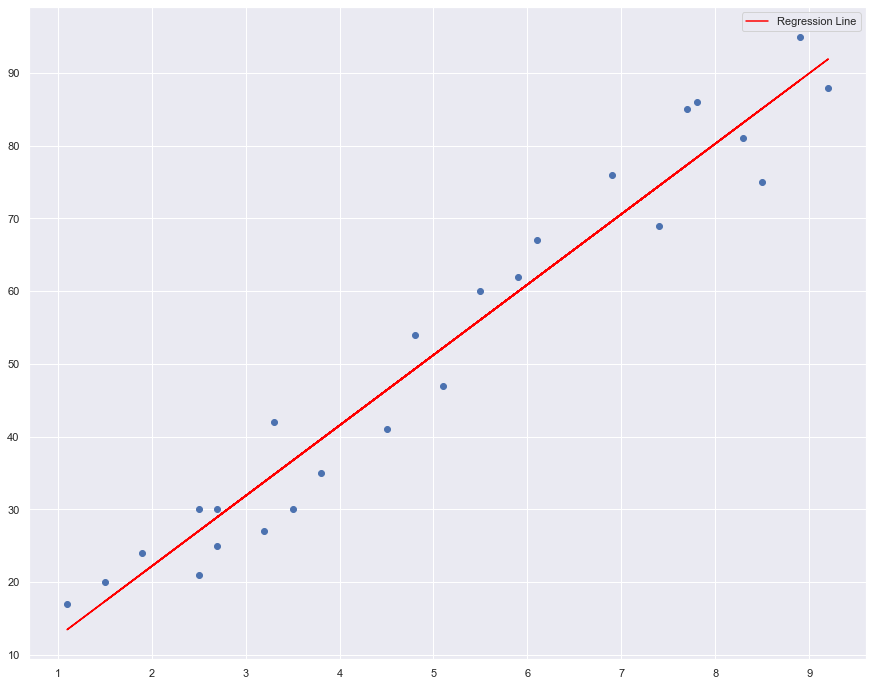

In [22]:
line = reg.coef_*feature + reg.intercept_

# Plotting for the test data
plt.figure(figsize=(15,12))
plt.scatter(feature, target)
plt.plot(feature, line,color='red', label='Regression Line')
plt.legend()
plt.show()

#### Converting the predictions into a dataframe

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred1})  
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Model Evaluation


In [24]:
print("Training Score:",reg.score(X_train,y_train))
print("Test Score:",reg.score(X_test,y_test))

Training Score: 0.9491209376364417
Test Score: 0.9678055545167994


#### Train and Test Scores look good

#### We will now evaluate on all the metrics

In [25]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred1)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('R-2:', metrics.r2_score(y_test, pred1))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


#### R-squared is a measure to determine how close the data is to the fitted regression line.It's values lie between 0 and 1.It tells us what percent of the variablity is accounted for by the regression line on the independent variable.An R-squared of value 1 means that all movements of another dependent variables are completely explained by movements in the independent variables.

#### An R-squared = 0.9678 means it is a good fit and also means that more than 96% of the variablity of the predicted variable is explained by the independent variables 

In [26]:
y_test_actual = np.array([9.5]).reshape(-1,1)
predicted = reg.predict(y_test_actual)
print('score would be',predicted[0])

score would be 94.80663482122885


## So according to the model a student studying 9.5hrs would score almost 95 marks .